In [1]:
#!/usr/bin/env julia
using ArgParse

using LilGuys
using CairoMakie

using StatsBase
using PythonCall
agama = pyimport("agama")
using Printf
using LinearAlgebra: cross


In [112]:
include(ENV["HOME"] * "/LilGuys.jl/scripts/animate_dm.jl")
include(ENV["HOME"] * "/LilGuys.jl/scripts/project_potential.jl")
include(ENV["HOME"] * "/LilGuys.jl/scripts/project_2d.jl")

[ Info: loading agama


In [3]:
modelname = "sculptor/1e5_V31_r3.2/orbit_mean"

"sculptor/1e5_V31_r3.2/orbit_mean"

In [4]:
cd(ENV["DWARFS_ROOT"] * "/analysis/$modelname")

In [5]:
out = Output(".")

<output with 213 snapshots of 100000 particles>

In [ ]:
text(

In [93]:
Makie.spaces()

(:data, :pixel, :relative, :clip)

In [92]:
round(12.242, sigdigits=2)

12.0

In [77]:
args = Dict()
args["limits"] = 200 .* [-1, 1, -1, 1]
args["n_bins"] = 501
args["skip"] = 20
x_vec = [sind(5), cosd(5), 0]
y_vec = [-sind(5), 0, cosd(5)]

3-element Vector{Float64}:
 -0.08715574274765818
  0.0
  0.9961946980917455

In [78]:
readdir("simulation")

10-element Vector{String}:
 "agama_potential.ini"
 "err.out"
 "initial.hdf5"
 "log.out"
 "make_init.sh"
 "orbit.csv"
 "out"
 "param.txt"
 "param.txt-usedvalues"
 "run.sh"

In [79]:
xbins = LinRange(args["limits"][1], args["limits"][2], args["n_bins"])
ybins = LinRange(args["limits"][3], args["limits"][4], args["n_bins"])
bins = (xbins, ybins)
@assert issorted(xbins) && issorted(ybins)


In [80]:
potential = agama.Potential("simulation/agama_potential.ini")

Python: CompositePotential{ Dehnen, MiyamotoNagai, MiyamotoNagai, NFW } (symmetry: Axisymmetric)

In [81]:
Σ_disk = project_agama_potential(potential, bins, x_vec=x_vec, y_vec=y_vec )
Σ_disk ./= maximum(Σ_disk)

500×500 Matrix{Float64}:
 0.000253573  0.000254538  0.000255506  …  0.000254538  0.000253573
 0.000254538  0.00025551   0.000256486     0.00025551   0.000254538
 0.000255506  0.000256486  0.000257469     0.000256486  0.000255506
 0.000256478  0.000257465  0.000258457     0.000257465  0.000256478
 0.000257453  0.000258448  0.000259447     0.000258448  0.000257453
 0.000258432  0.000259435  0.000260442  …  0.000259435  0.000258432
 0.000259415  0.000260426  0.00026144      0.000260426  0.000259415
 0.000260401  0.000261419  0.000262442     0.000261419  0.000260401
 0.000261391  0.000262417  0.000263447     0.000262417  0.000261391
 0.000262384  0.000263418  0.000264456     0.000263418  0.000262384
 0.000263381  0.000264423  0.000265469  …  0.000264423  0.000263381
 0.000264381  0.000265431  0.000266485     0.000265431  0.000264381
 0.000265384  0.000266443  0.000267505     0.000266443  0.000265384
 ⋮                                      ⋱               
 0.000264381  0.000265431  0.00026

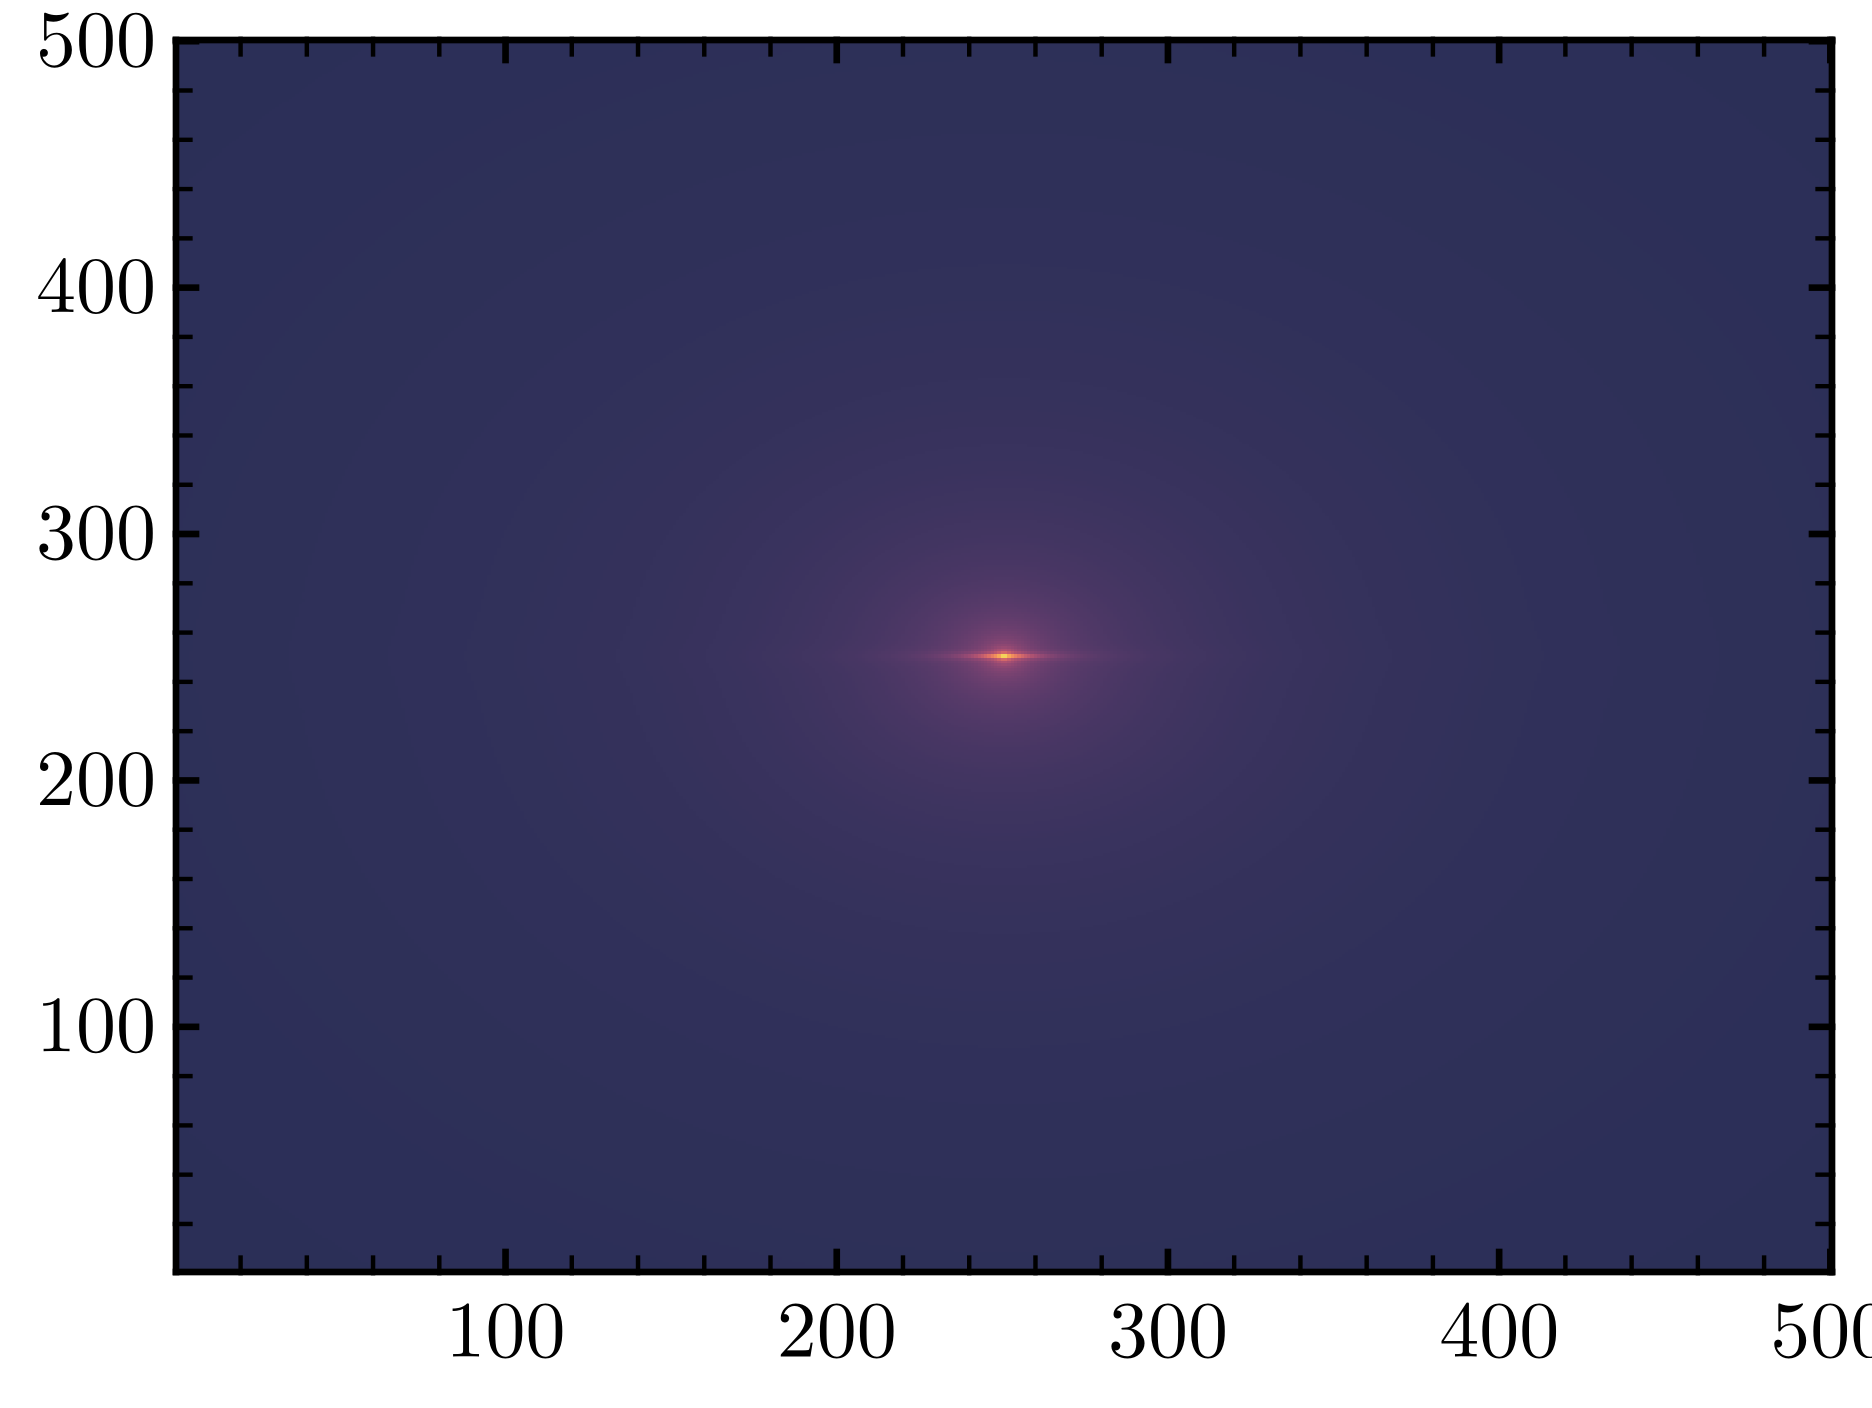

In [82]:
heatmap(sqrt.(Σ_disk))

In [83]:
x, y, w = get_xy(out, 1,  x_vec=x_vec, y_vec=y_vec)
h0 = project_points(x, y, w, bins,)
h_scale = maximum(h0)

h0 = h0 ./ h_scale

500×500 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮    ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  

In [84]:
x, y, w = get_xy(out, 200,  x_vec=x_vec, y_vec=y_vec)
h = project_points(x, y, w, bins,) ./ h_scale

500×500 Matrix{Float64}:
 0.0          0.0  0.0  0.0          0.0  0.0  …  0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0  …  0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0
 0.000527983  0.0  0.0  0.0          0.0  0.0  …  0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0
 0.0          0.0  0.0  0.0          0.0  0.0     0.0  0.0  0.0  0.0  0.0
 ⋮           

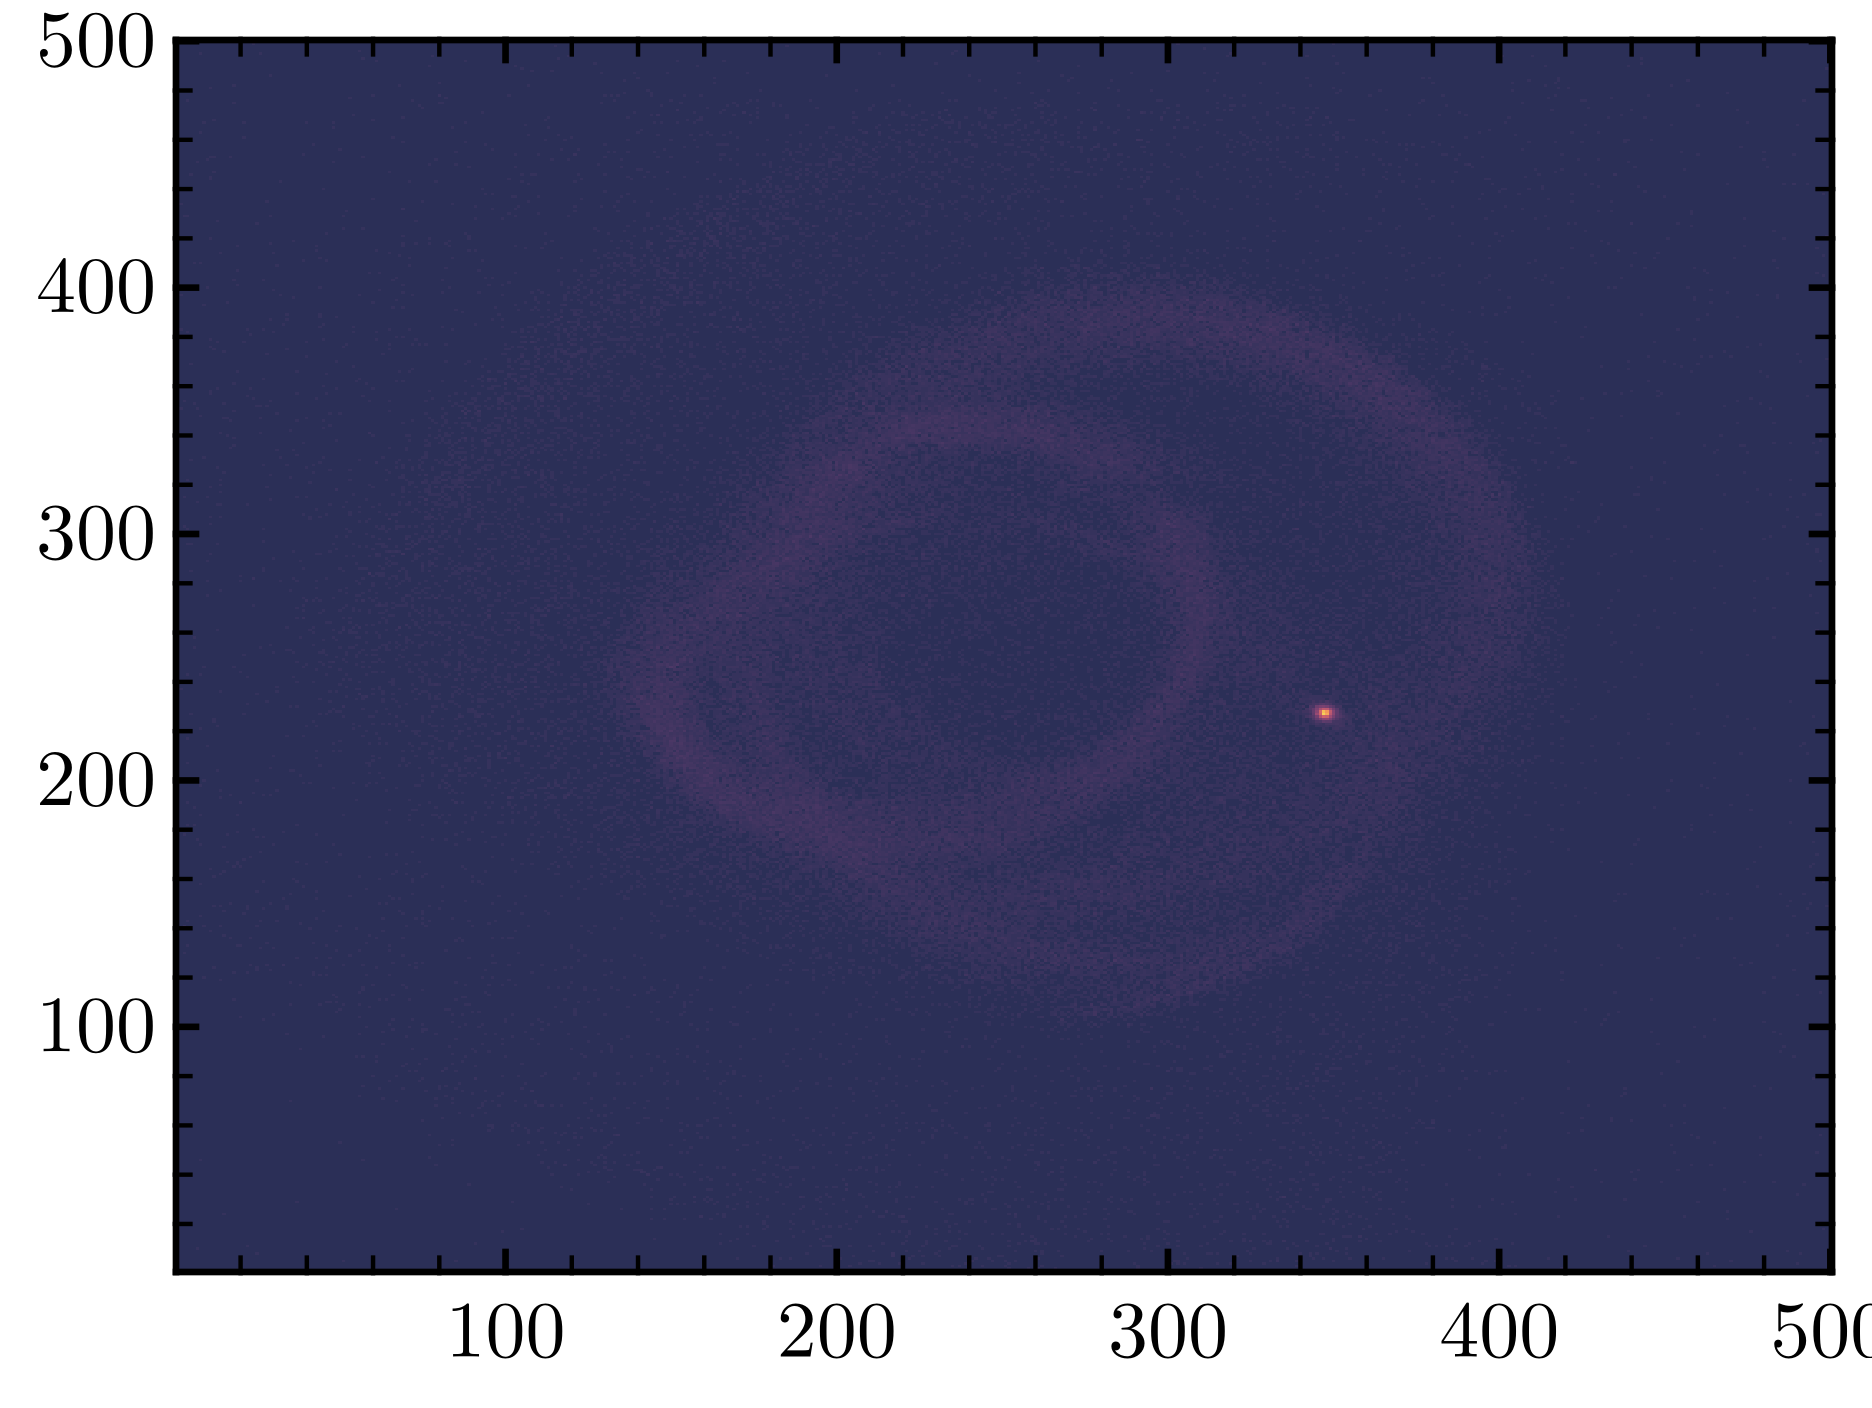

In [85]:
heatmap(sqrt.(h))

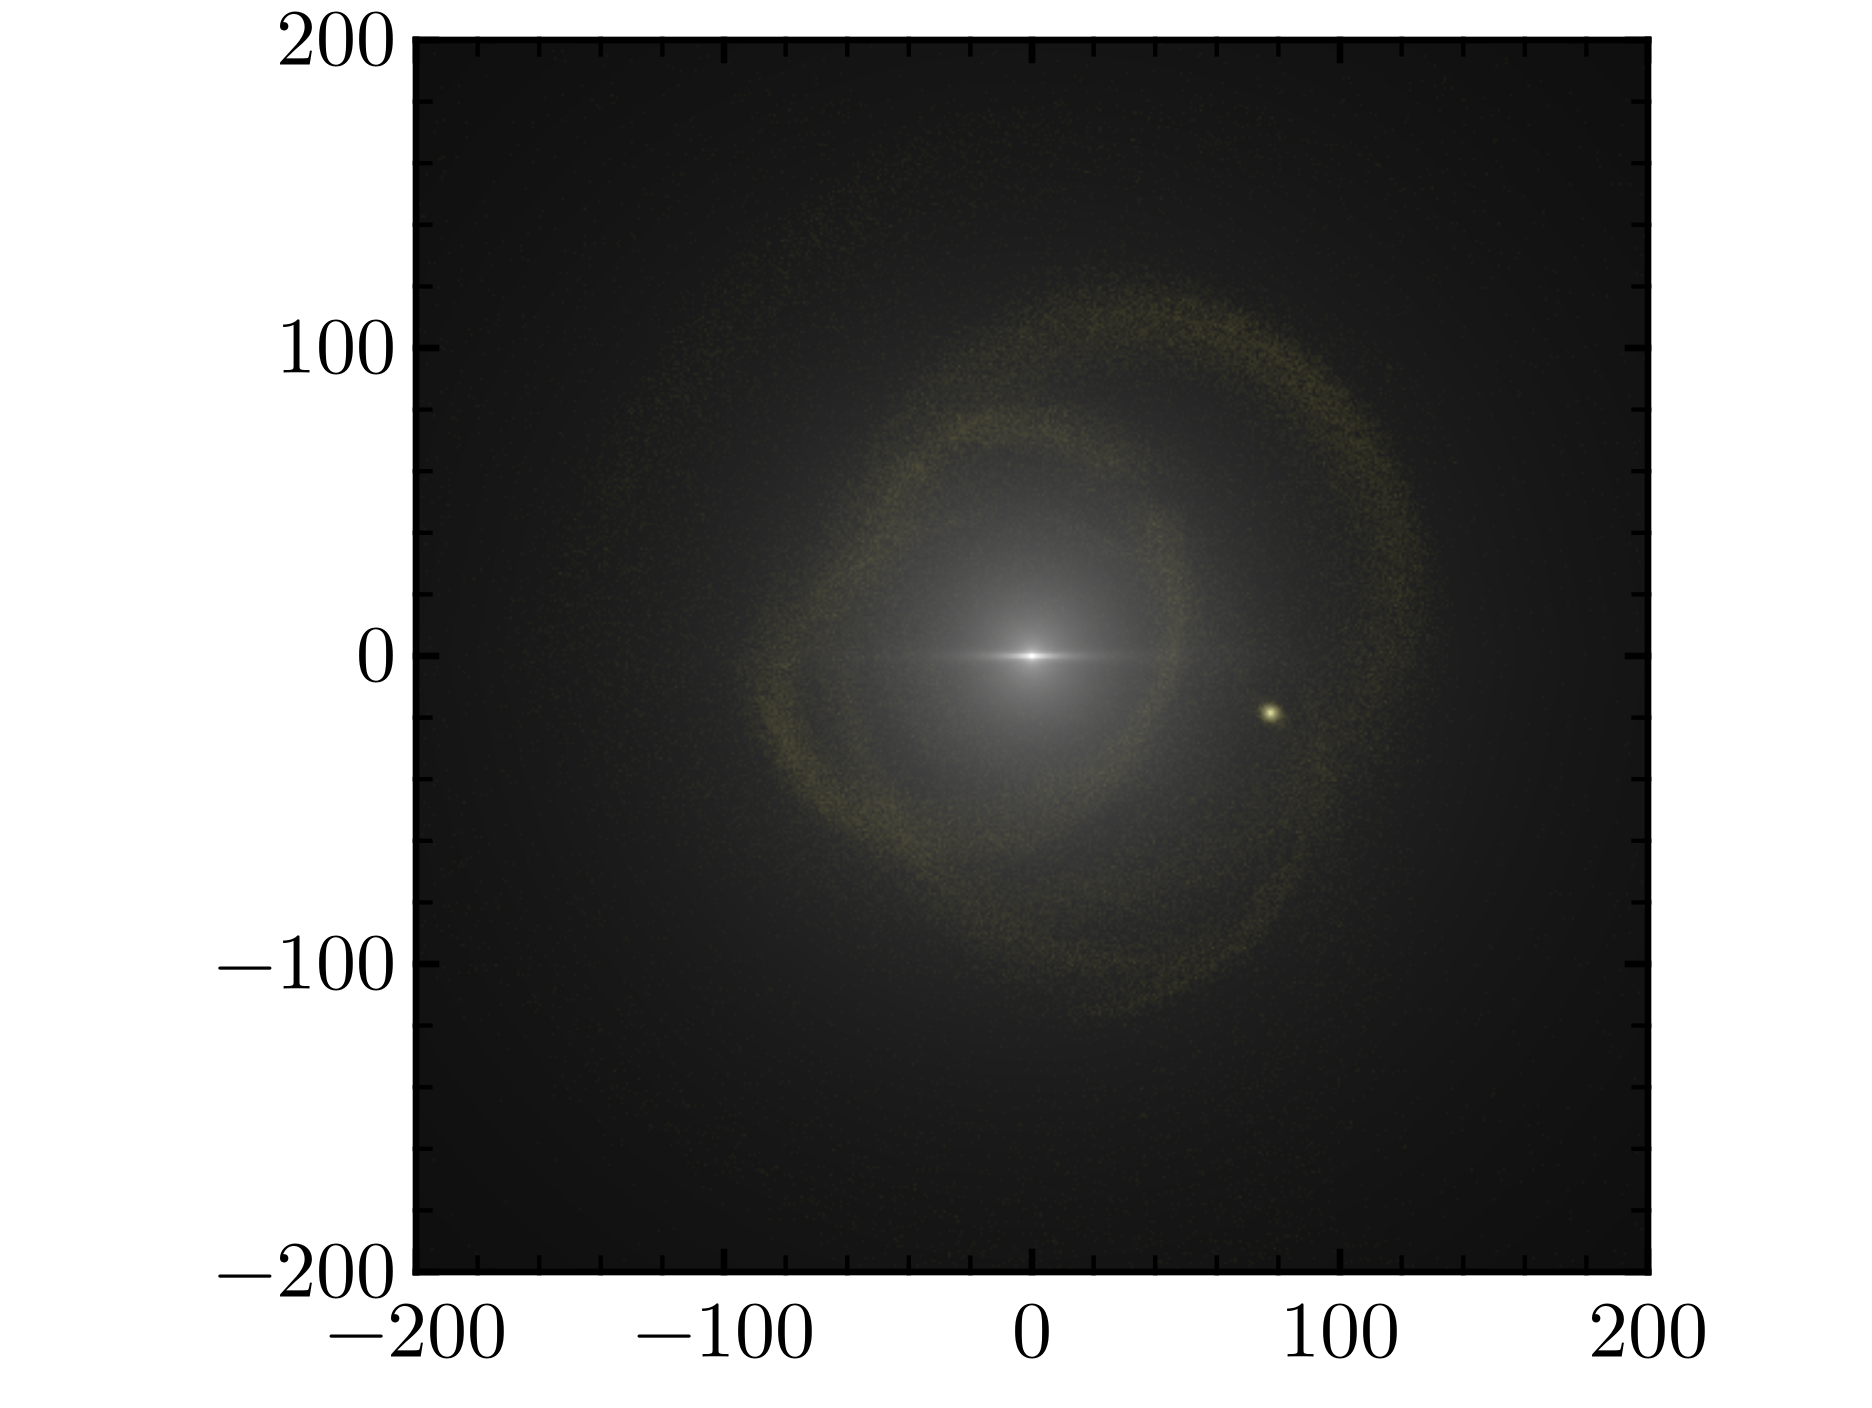

In [118]:
image(extrema(xbins), extrema(ybins), combine_densities([h, Σ_disk], [yellow, white], dm_power=0.5), axis=(;aspect=DataAspect()))